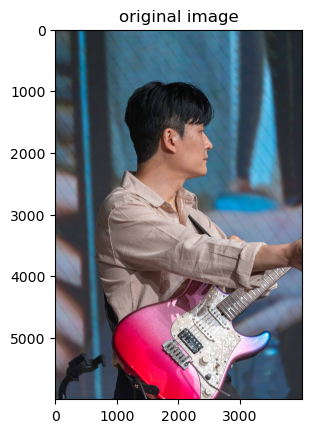

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/_X1A0297-3-Enhanced-NR.jpg')
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('original image')
plt.show()

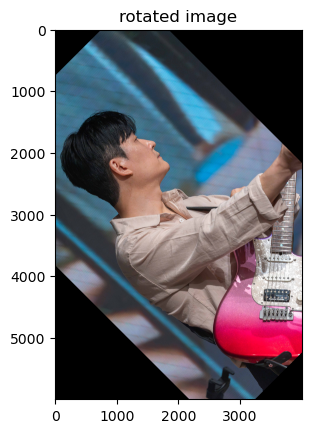

In [9]:
def rotate_image(img, angle, center=None):
    rows, cols, _ = img.shape
    if center is None:
        center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

rotated_img = rotate_image(image, 45)
plt.imshow(rotated_img)
plt.title('rotated image')
plt.show()

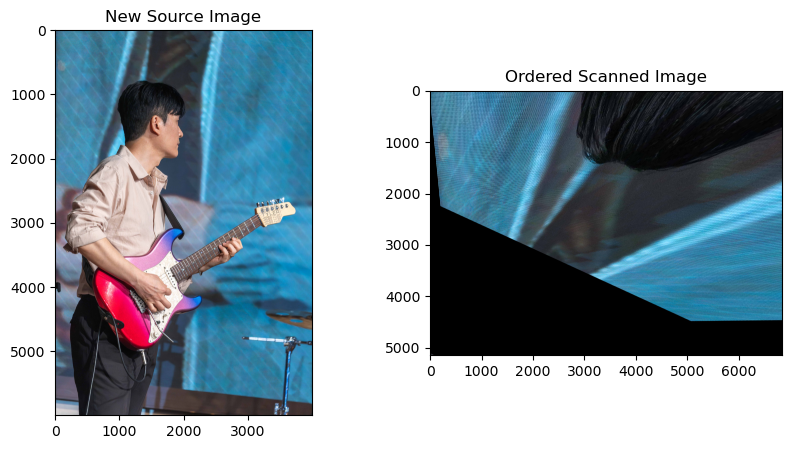

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = 'images/_X1A0725-Enhanced-NR.jpg'
new_source_image = cv2.imread(image_path)

ordered_corners = np.array([[10, 800], [1800, 1100], [5000, 100], [1200, 5800]], dtype='float32')

ordered_width = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[1]), np.linalg.norm(ordered_corners[2] - ordered_corners[3])))
ordered_height = int(max(np.linalg.norm(ordered_corners[0] - ordered_corners[3]), np.linalg.norm(ordered_corners[1] - ordered_corners[2])))

ordered_rect_corners = np.array([[0, 0], [ordered_width, 0], [ordered_width, ordered_height], [0, ordered_height]], dtype='float32')

ordered_scan_matrix = cv2.getPerspectiveTransform(ordered_corners, ordered_rect_corners)

ordered_scanned_image = cv2.warpPerspective(new_source_image, ordered_scan_matrix, (ordered_width, ordered_height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("New Source Image")
plt.imshow(cv2.cvtColor(new_source_image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)

plt.title("Ordered Scanned Image")
plt.imshow(cv2.cvtColor(ordered_scanned_image, cv2.COLOR_BGR2RGB))
plt.show()